## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(x)
    
    output_layer = keras.layers.Dense(units=output_units, activation='softmax', name='output_layer')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 0.001
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.15, 0.35, 0.55, 0.75, 0.95]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for nest in enumerate([False, True]):
    exp_name_tag1 = 'nesterov-%s' % str(nest)
    results[exp_name_tag1] = {}
    for mm in MOMENTUM:
        keras.backend.clear_session()
        print('Experiment with momentum %f' % mm)
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=nest, momentum=mm)
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        
        model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), shuffle=True)
        
        train_loss = model.history.history['loss']
        valid_loss = model.history.history['val_loss']        
        train_acc = model.history.history['acc']
        valid_acc = model.history.history['val_acc']
        
        exp_name_tag2 = 'momentum-%s' % str(mm)
        results[exp_name_tag1][exp_name_tag2] = {'train_loss': train_loss, 
                                                'valid_loss': valid_loss, 
                                                'train_acc': train_acc, 
                                                'valid_acc': valid_acc}





Experiment with momentum 0.150000


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.wher

50000/50000 [==============================] - 19s 372us/step - loss: 1.6856 - acc: 0.4127 - val_loss: 1.6906 - val_acc: 0.4114
Epoch 41/50
50000/50000 [==============================] - 23s 469us/step - loss: 1.6815 - acc: 0.4148 - val_loss: 1.6894 - val_acc: 0.4104
Epoch 42/50
50000/50000 [==============================] - 23s 457us/step - loss: 1.6777 - acc: 0.4157 - val_loss: 1.6830 - val_acc: 0.4128
Epoch 43/50
50000/50000 [==============================] - 18s 363us/step - loss: 1.6733 - acc: 0.4161 - val_loss: 1.6783 - val_acc: 0.4134
Epoch 44/50
50000/50000 [==============================] - 17s 333us/step - loss: 1.6691 - acc: 0.4183 - val_loss: 1.6762 - val_acc: 0.4166
Epoch 45/50
50000/50000 [==============================] - 15s 290us/step - loss: 1.6654 - acc: 0.4196 - val_loss: 1.6727 - val_acc: 0.4172
Epoch 46/50
50000/50000 [==============================] - 14s 279us/step - loss: 1.6616 - acc: 0.4202 - val_loss: 1.6683 - val_acc: 0.4192
Epoch 47/50
50000/50000 [=======

Epoch 41/50
50000/50000 [==============================] - 17s 337us/step - loss: 1.6327 - acc: 0.4303 - val_loss: 1.6385 - val_acc: 0.4272
Epoch 42/50
50000/50000 [==============================] - 17s 345us/step - loss: 1.6282 - acc: 0.4310 - val_loss: 1.6330 - val_acc: 0.4284
Epoch 43/50
50000/50000 [==============================] - 15s 304us/step - loss: 1.6241 - acc: 0.4346 - val_loss: 1.6311 - val_acc: 0.4279
Epoch 44/50
50000/50000 [==============================] - 16s 316us/step - loss: 1.6202 - acc: 0.4346 - val_loss: 1.6264 - val_acc: 0.4312
Epoch 45/50
50000/50000 [==============================] - 15s 308us/step - loss: 1.6159 - acc: 0.4360 - val_loss: 1.6286 - val_acc: 0.4314
Epoch 46/50
50000/50000 [==============================] - 15s 296us/step - loss: 1.6125 - acc: 0.4369 - val_loss: 1.6201 - val_acc: 0.4306
Epoch 47/50
50000/50000 [==============================] - 16s 311us/step - loss: 1.6085 - acc: 0.4394 - val_loss: 1.6182 - val_acc: 0.4298
Epoch 48/50
50000/50

50000/50000 [==============================] - 13s 269us/step - loss: 1.5711 - acc: 0.4534 - val_loss: 1.5852 - val_acc: 0.4444
Epoch 42/50
50000/50000 [==============================] - 17s 332us/step - loss: 1.5664 - acc: 0.4570 - val_loss: 1.5807 - val_acc: 0.4473s
Epoch 43/50
50000/50000 [==============================] - 14s 276us/step - loss: 1.5612 - acc: 0.4569 - val_loss: 1.5785 - val_acc: 0.4477
Epoch 44/50
50000/50000 [==============================] - 14s 275us/step - loss: 1.5562 - acc: 0.4582 - val_loss: 1.5741 - val_acc: 0.4500
Epoch 45/50
50000/50000 [==============================] - 13s 268us/step - loss: 1.5515 - acc: 0.4599 - val_loss: 1.5745 - val_acc: 0.4487
Epoch 46/50
50000/50000 [==============================] - 14s 274us/step - loss: 1.5469 - acc: 0.4621 - val_loss: 1.5742 - val_acc: 0.4479
Epoch 47/50
50000/50000 [==============================] - 13s 263us/step - loss: 1.5429 - acc: 0.4632 - val_loss: 1.5660 - val_acc: 0.4483 2 - ETA: 0s - loss: 1.5436 - ac

50000/50000 [==============================] - 13s 261us/step - loss: 1.4463 - acc: 0.4936 - val_loss: 1.5000 - val_acc: 0.4722
Epoch 42/50
50000/50000 [==============================] - 14s 286us/step - loss: 1.4402 - acc: 0.4958 - val_loss: 1.4750 - val_acc: 0.4774
Epoch 43/50
50000/50000 [==============================] - 15s 294us/step - loss: 1.4341 - acc: 0.4982 - val_loss: 1.4761 - val_acc: 0.4765
Epoch 44/50
50000/50000 [==============================] - 14s 274us/step - loss: 1.4287 - acc: 0.5006 - val_loss: 1.4696 - val_acc: 0.4819
Epoch 45/50
50000/50000 [==============================] - 13s 268us/step - loss: 1.4234 - acc: 0.5012 - val_loss: 1.4700 - val_acc: 0.479621 - acc:
Epoch 46/50
50000/50000 [==============================] - 13s 264us/step - loss: 1.4177 - acc: 0.5052 - val_loss: 1.4635 - val_acc: 0.4805
Epoch 47/50
50000/50000 [==============================] - 13s 268us/step - loss: 1.4118 - acc: 0.5067 - val_loss: 1.4630 - val_acc: 0.4843TA: 1s - 
Epoch 48/50
50

50000/50000 [==============================] - 13s 269us/step - loss: 0.9924 - acc: 0.6496 - val_loss: 1.3718 - val_acc: 0.5291
Epoch 42/50
50000/50000 [==============================] - 14s 271us/step - loss: 0.9780 - acc: 0.6549 - val_loss: 1.3787 - val_acc: 0.5259
Epoch 43/50
50000/50000 [==============================] - 14s 272us/step - loss: 0.9677 - acc: 0.6596 - val_loss: 1.3625 - val_acc: 0.5335
Epoch 44/50
50000/50000 [==============================] - 14s 280us/step - loss: 0.9511 - acc: 0.6644 - val_loss: 1.3627 - val_acc: 0.5340
Epoch 45/50
50000/50000 [==============================] - 13s 265us/step - loss: 0.9447 - acc: 0.6659 - val_loss: 1.3620 - val_acc: 0.5317
Epoch 46/50
50000/50000 [==============================] - 13s 269us/step - loss: 0.9308 - acc: 0.6738 - val_loss: 1.3947 - val_acc: 0.5229
Epoch 47/50
50000/50000 [==============================] - 14s 274us/step - loss: 0.9199 - acc: 0.6738 - val_loss: 1.3705 - val_acc: 0.5313
Epoch 48/50
50000/50000 [=======

Epoch 42/50
50000/50000 [==============================] - 12s 238us/step - loss: 1.6948 - acc: 0.4095 - val_loss: 1.6967 - val_acc: 0.4020
Epoch 43/50
50000/50000 [==============================] - 12s 237us/step - loss: 1.6909 - acc: 0.4093 - val_loss: 1.6934 - val_acc: 0.4105
Epoch 44/50
50000/50000 [==============================] - 12s 237us/step - loss: 1.6872 - acc: 0.4110 - val_loss: 1.6881 - val_acc: 0.4082
Epoch 45/50
50000/50000 [==============================] - 12s 238us/step - loss: 1.6831 - acc: 0.4135 - val_loss: 1.6829 - val_acc: 0.4053
Epoch 46/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.6792 - acc: 0.4154 - val_loss: 1.6792 - val_acc: 0.4112
Epoch 47/50
50000/50000 [==============================] - 12s 240us/step - loss: 1.6750 - acc: 0.4162 - val_loss: 1.6767 - val_acc: 0.4098
Epoch 48/50
50000/50000 [==============================] - 13s 253us/step - loss: 1.6716 - acc: 0.4185 - val_loss: 1.6726 - val_acc: 0.4150
Epoch 49/50
50000/50

Epoch 43/50
50000/50000 [==============================] - 11s 223us/step - loss: 1.6335 - acc: 0.4324 - val_loss: 1.6454 - val_acc: 0.4248
Epoch 44/50
50000/50000 [==============================] - 11s 223us/step - loss: 1.6290 - acc: 0.4331 - val_loss: 1.6390 - val_acc: 0.4287
Epoch 45/50
50000/50000 [==============================] - 11s 223us/step - loss: 1.6245 - acc: 0.4344 - val_loss: 1.6413 - val_acc: 0.4258
Epoch 46/50
50000/50000 [==============================] - 12s 234us/step - loss: 1.6209 - acc: 0.4354 - val_loss: 1.6303 - val_acc: 0.4302
Epoch 47/50
50000/50000 [==============================] - 12s 231us/step - loss: 1.6166 - acc: 0.4379 - val_loss: 1.6277 - val_acc: 0.4307
Epoch 48/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.6124 - acc: 0.4394 - val_loss: 1.6255 - val_acc: 0.4322
Epoch 49/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.6084 - acc: 0.4413 - val_loss: 1.6204 - val_acc: 0.4354
Epoch 50/50
50000/50

50000/50000 [==============================] - 12s 237us/step - loss: 1.5524 - acc: 0.4585 - val_loss: 1.5739 - val_acc: 0.4506
Epoch 44/50
50000/50000 [==============================] - 11s 230us/step - loss: 1.5472 - acc: 0.4600 - val_loss: 1.5668 - val_acc: 0.4540
Epoch 45/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.5422 - acc: 0.4627 - val_loss: 1.5682 - val_acc: 0.4469
Epoch 46/50
50000/50000 [==============================] - 12s 230us/step - loss: 1.5381 - acc: 0.4638 - val_loss: 1.5646 - val_acc: 0.4496
Epoch 47/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.5344 - acc: 0.4649 - val_loss: 1.5620 - val_acc: 0.4542
Epoch 48/50
50000/50000 [==============================] - 12s 230us/step - loss: 1.5297 - acc: 0.4655 - val_loss: 1.5589 - val_acc: 0.4548
Epoch 49/50
50000/50000 [==============================] - 11s 230us/step - loss: 1.5260 - acc: 0.4678 - val_loss: 1.5587 - val_acc: 0.4570
Epoch 50/50
50000/50000 [=======

Epoch 44/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.4436 - acc: 0.4932 - val_loss: 1.4786 - val_acc: 0.4780
Epoch 45/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.4381 - acc: 0.4963 - val_loss: 1.4922 - val_acc: 0.4724
Epoch 46/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.4321 - acc: 0.4980 - val_loss: 1.4844 - val_acc: 0.4777
Epoch 47/50
50000/50000 [==============================] - 12s 230us/step - loss: 1.4276 - acc: 0.5005 - val_loss: 1.4821 - val_acc: 0.4746
Epoch 48/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.4217 - acc: 0.5036 - val_loss: 1.4669 - val_acc: 0.4801
Epoch 49/50
50000/50000 [==============================] - 11s 230us/step - loss: 1.4165 - acc: 0.5043 - val_loss: 1.4621 - val_acc: 0.4818
Epoch 50/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.4108 - acc: 0.5057 - val_loss: 1.4572 - val_acc: 0.4836
Experiment with mome

Epoch 45/50
50000/50000 [==============================] - 11s 230us/step - loss: 0.9404 - acc: 0.6687 - val_loss: 1.4523 - val_acc: 0.5104
Epoch 46/50
50000/50000 [==============================] - 11s 226us/step - loss: 0.9278 - acc: 0.6730 - val_loss: 1.3646 - val_acc: 0.5302
Epoch 47/50
50000/50000 [==============================] - 11s 228us/step - loss: 0.9100 - acc: 0.6806 - val_loss: 1.4372 - val_acc: 0.5184
Epoch 48/50
50000/50000 [==============================] - 12s 230us/step - loss: 0.9063 - acc: 0.6813 - val_loss: 1.4129 - val_acc: 0.5211
Epoch 49/50
50000/50000 [==============================] - 12s 231us/step - loss: 0.8908 - acc: 0.6867 - val_loss: 1.4441 - val_acc: 0.5204
Epoch 50/50
50000/50000 [==============================] - 12s 231us/step - loss: 0.8812 - acc: 0.6922 - val_loss: 1.3869 - val_acc: 0.5347


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


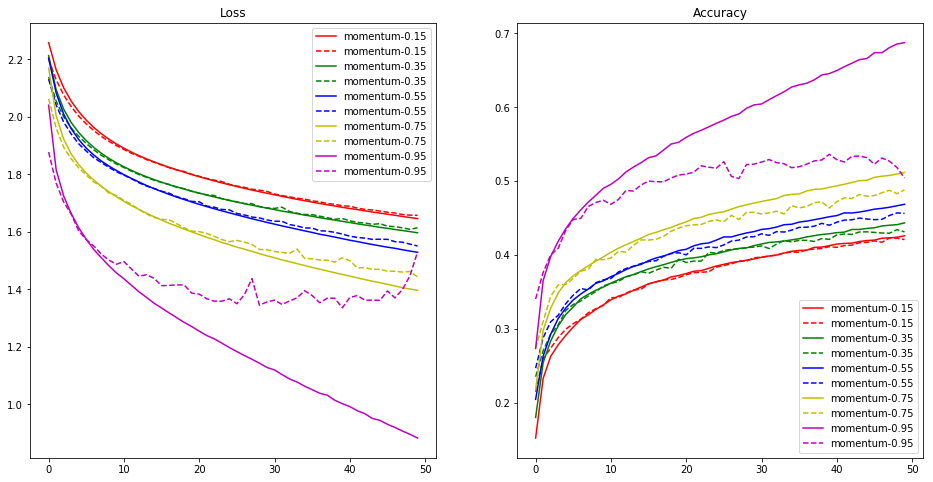

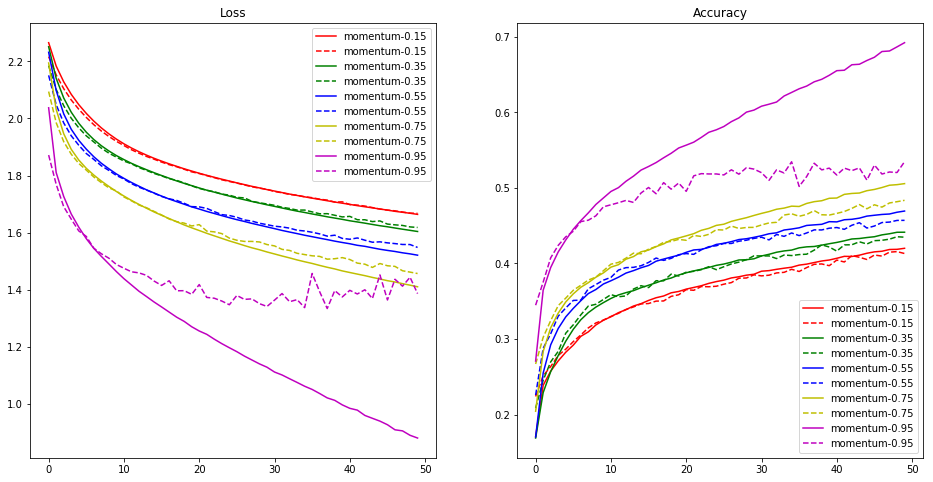

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m"]

for i, tag1 in enumerate(results.keys()):
    plt.figure(figsize=(16, 8))
    for j, tag2 in enumerate(results[tag1].keys()):
        plt.subplot(121)
        plt.plot(range(len(results[tag1][tag2]['train_loss'])),
                 results[tag1][tag2]['train_loss'], '-', label=tag2, color=color_bar[j])
        plt.plot(range(len(results[tag1][tag2]['valid_loss'])), 
                 results[tag1][tag2]['valid_loss'], '--', label=tag2, color=color_bar[j])
        plt.title('Loss')
        plt.legend()
        
        plt.subplot(122)
        plt.plot(range(len(results[tag1][tag2]['train_acc'])),
                 results[tag1][tag2]['train_acc'], '-', label=tag2, color=color_bar[j])
        plt.plot(range(len(results[tag1][tag2]['valid_acc'])),
                 results[tag1][tag2]['valid_acc'], '--', label=tag2, color=color_bar[j])
        plt.title('Accuracy')
        plt.legend()
    plt.show()